### Question 1: Roberts, Sobel, Canny Edge Detector

In [3]:
import cv2
import numpy as np
from scipy import ndimage
from plot_utils import *

image = cv2.imread('retina2/172.bmp', cv2.COLOR_BGR2GRAY)
image_float = image.astype('float64')

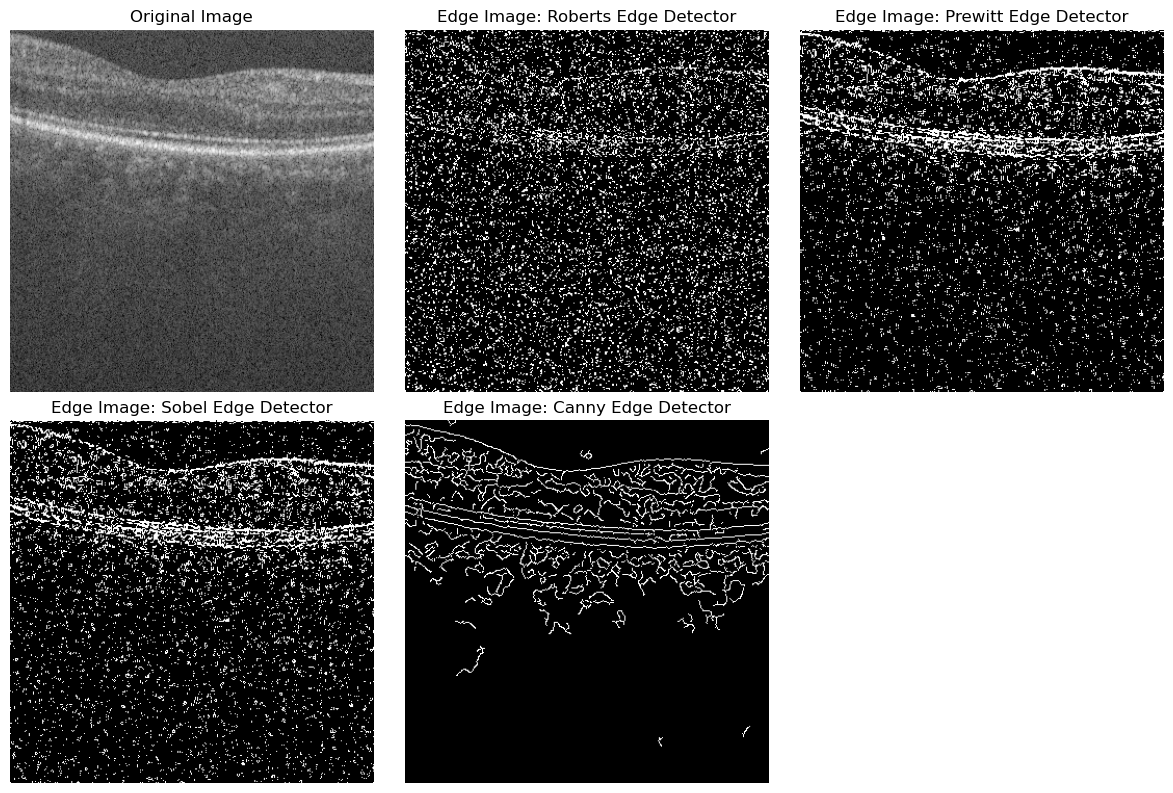

In [2]:
# Roberts Edge Detector
kernel_robertsX = np.array([[1, 0], [0, -1]])
kernel_robertsY = np.array([[0, 1], [-1, 0]])
robertsY = ndimage.convolve(image_float, kernel_robertsX)
robertsX = ndimage.convolve(image_float, kernel_robertsY)
roberts = np.sqrt(np.square(robertsX) + np.square(robertsY))
robert_img = np.zeros_like(image)
robert_img[roberts > 0.3*roberts.max()] = 255

# Prewitt Edge Detector
kernel_prewittX = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
kernel_prewittY = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
prewittX = ndimage.convolve(image_float, kernel_prewittX)
prewittY = ndimage.convolve(image_float, kernel_prewittY)
prewitt = np.sqrt(np.square(prewittX) + np.square(prewittY))
prewitt_img = np.zeros_like(image)
prewitt_img[prewitt > 0.3*prewitt.max()] = 255

# Sobel Edge Detector
kernel_sobelX = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
kernel_sobelY = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobelX = ndimage.convolve(image_float, kernel_sobelX)
sobelY = ndimage.convolve(image_float, kernel_sobelY)
sobel = np.sqrt(np.square(sobelX) + np.square(sobelY))
sobel_img = np.zeros_like(image)
sobel_img[sobel > 0.3*sobel.max()] = 255

# Canny Edge Detector
# sigma = 0.33
# # auto canny
# v = np.median(image)
# # apply automatic Canny edge detection using the computed median
# lower = int(max(0, (1.0 - sigma) * v))
# upper = int(min(255, (1.0 + sigma) * v))
# print(lower, upper)

canny = cv2.GaussianBlur(image, (0, 0), 2)
canny_img = cv2.Canny(canny, 0.05*image.max(), 0.15*image.max(), 3)

images = [[image_float, robert_img, prewitt_img], [sobel_img, canny_img, None]]
titles = [['Original Image', 'Edge Image: Roberts Edge Detector', 'Edge Image: Prewitt Edge Detector'],
          ['Edge Image: Sobel Edge Detector', 'Edge Image: Canny Edge Detector', '']]

plot_images(images, titles, dpi=100)

The canny detector is chosen to be the best edge detector.